In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-darkgrid")

## Tabla Fletes

Esta tabla describe todos los transportistas disponibles, los rangos de peso para cada ruta individual y las tarifas asociadas. 

In [2]:
freights = pd.read_excel("data.xlsx", sheet_name = "FreightRates")

freights.columns = ["Transportista", "Puerto de origen", "Puerto de destino", "Peso mínimo [kg/item]", "Peso máximo [kg/item]", 
                  "Nivel de servicio", "Costo mínimo [USD/kg]", "Tasa de flete [USD/kg]", "Modo de transporte", "Envío [días]", 
                  "Tipo de transportista"]

freights[["Puerto de origen", "Puerto de destino"]] = freights[["Puerto de origen", "Puerto de destino"]].replace({"[^\d.]": ""}, regex = True).astype(int)
freights["Modo de transporte"] = freights["Modo de transporte"].replace({"AIR   ": "Aire", "GROUND": "Tierra"}, regex = True)

In [3]:
freights.head()

,Transportista,Puerto de origen,Puerto de destino,Peso mínimo [kg/item],Peso máximo [kg/item],Nivel de servicio,Costo mínimo [USD/kg],Tasa de flete [USD/kg],Modo de transporte,Envío [días],Tipo de transportista
0,V444_6,8,9,250.0,499.99,DTD,43.2272,0.7132,Aire,2,V88888888_0
1,V444_6,8,9,65.0,69.99,DTD,43.2272,0.7512,Aire,2,V88888888_0
2,V444_6,8,9,60.0,64.99,DTD,43.2272,0.7892,Aire,2,V88888888_0
3,V444_6,8,9,50.0,54.99,DTD,43.2272,0.8272,Aire,2,V88888888_0
4,V444_6,8,9,35.0,39.99,DTD,43.2272,1.0552,Aire,2,V88888888_0


In [4]:
freights.dtypes

Transportista              object
Puerto de origen            int32
Puerto de destino           int32
Peso mínimo [kg/item]     float64
Peso máximo [kg/item]     float64
Nivel de servicio          object
Costo mínimo [USD/kg]     float64
Tasa de flete [USD/kg]    float64
Modo de transporte         object
Envío [días]                int64
Tipo de transportista      object
dtype: object

*¿La tabla contiene filas duplicadas? Si tiene filas duplicadas, deben ser eliminadas.*

In [5]:
if __name__ == "__main__":
    if freights.duplicated().any():
        print("La tabla tiene filas duplicadas.")
        freights.drop_duplicates(inplace = True)
    else:
        print("La tabla no tiene filas duplicadas.")

La tabla tiene filas duplicadas.


*¿La tabla tiene valores nulos? Si tiene valones nulos, las filas que los contienen deben ser eliminadas.*

In [6]:
if __name__ == "__main__":
    if freights.isna().any(axis = None):
        print("La tabla tiene valores nulos.")
        freights.dropna(axis = 1, inplace = True)
    else:
        print("La tabla no tiene valores nulos.")

La tabla no tiene valores nulos.


In [7]:
g1 = freights.groupby(by = ["Puerto de origen", "Puerto de destino"]).agg({"Tasa de flete [USD/kg]": ["min", "mean", "max", "std"]})
g1.round(2)

Tasa de flete [USD/kg]                     
                                                      min  mean     max    std
Puerto de origen Puerto de destino                                            
2                9                                   0.05  1.87    7.06   1.78
3                9                                   0.12  9.84  128.03  19.98
4                9                                   0.04  1.94    7.66   2.05
5                9                                   0.07  2.87   12.07   2.90
6                9                                   0.07  2.53    7.16   1.74
7                9                                   0.14  0.20    0.28   0.04
8                9                                   0.10  0.59    1.83   0.56
9                9                                   0.03  2.84   21.28   6.59
10               9                                   0.10  5.37   18.96   4.99
11               9                                   0.07  0.13    0.34   0.06

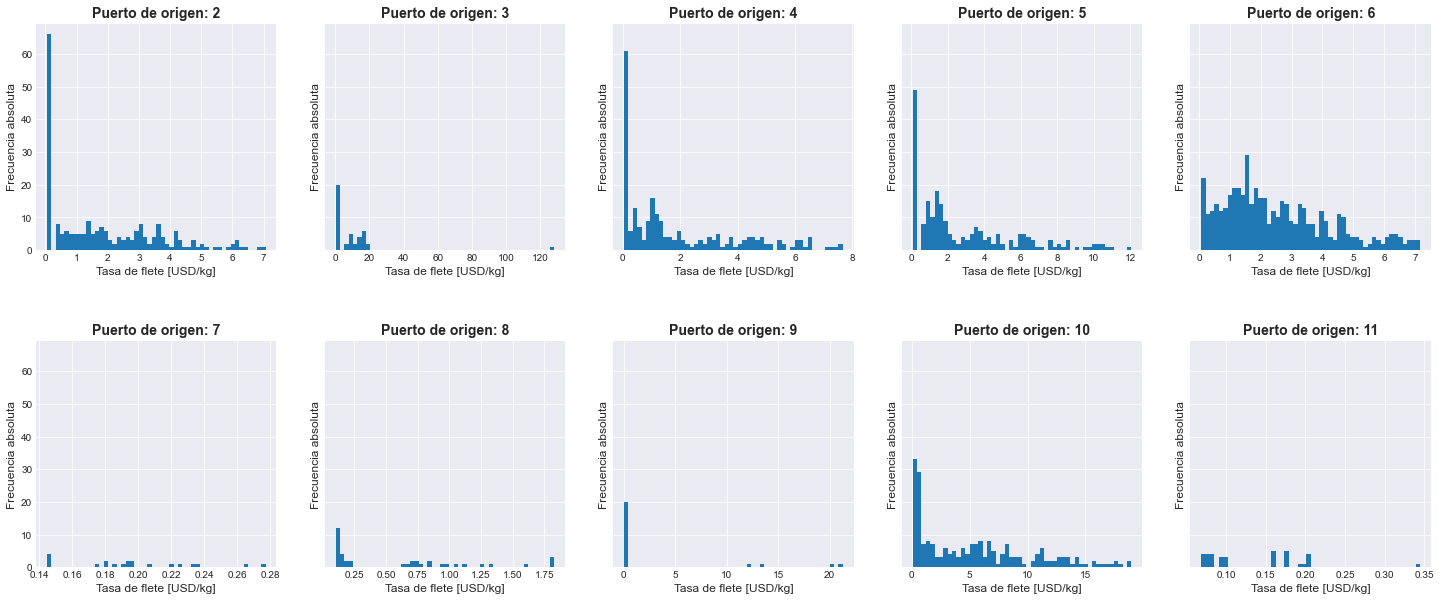

In [8]:
if __name__ == "__main__":
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25, 10), sharey = True)
    plt.subplots_adjust(hspace = 0.4)
    count = 2
    for i in range(2):
        for j in range(5):
            x = freights.loc[freights["Puerto de origen"] == count, "Tasa de flete [USD/kg]"]
            ax[i, j].set_title("Puerto de origen: {}".format(count), fontsize =  14, fontweight = "bold")
            ax[i, j].hist(x, bins = 50)
            ax[i, j].set_xlabel("Tasa de flete [USD/kg]", fontsize =  12)
            ax[i, j].set_ylabel("Frecuencia absoluta", fontsize =  12)
            count += 1


In [9]:
g2 = freights.groupby(by = ["Puerto de origen", "Puerto de destino"]).agg({"Envío [días]": ["min", "mean", "max", "sum"]})
g2.round(2)

Envío [días]               
                                            min  mean max  sum
Puerto de origen Puerto de destino                            
2                9                            0  1.62  14  366
3                9                            0  3.05  14  128
4                9                            0  1.58  14  366
5                9                            1  1.27   4  278
6                9                            1  1.99   3  953
7                9                            3  4.50   6   90
8                9                            2  4.82  14  188
9                9                            0  4.42  14  106
10               9                            2  3.17   6  704
11               9                            0  5.29  14  185

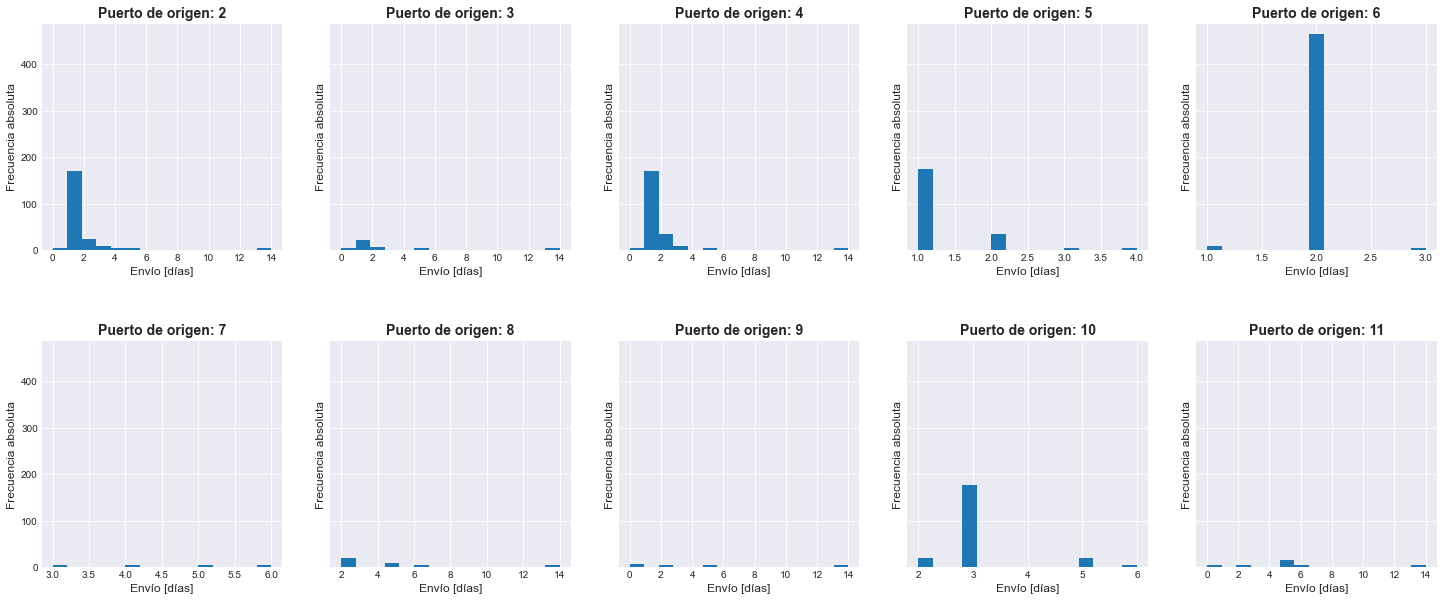

In [10]:
if __name__ == "__main__":
    fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (25, 10), sharey = True)
    plt.subplots_adjust(hspace = 0.4) 
    count = 2
    for i in range(2):
        for j in range(5):
            x = freights.loc[freights["Puerto de origen"] == count, "Envío [días]"]
            ax[i, j].set_title("Puerto de origen: {}".format(count), fontsize =  14, fontweight = "bold")
            ax[i, j].hist(x, bins = 15)
            ax[i, j].set_xlabel("Envío [días]", fontsize =  12)
            ax[i, j].set_ylabel("Frecuencia absoluta", fontsize =  12)
            count += 1

In [11]:
g3 = freights.groupby(by = "Modo de transporte").agg({"Puerto de origen": "size"}).rename(columns = {"Puerto de origen": "Recuento de Puerto de origen"})
g3

,Recuento de Puerto de origen
Modo de transporte,
Aire,1511
Tierra,26
